In [ ]:
 from google.colab import auth
import gspread
from google.auth import default
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)



In [ ]:
worksheet = gc.open('deep1').sheet1

rows = worksheet.get_all_values()


In [ ]:
df = pd.DataFrame(rows[1:], columns=rows[0])
df = df.astype({'input':'float'})
df = df.astype({'output':'float'})
df.head()

,input,output
0,1.0,20.0
1,2.0,21.0
2,3.0,22.0
3,4.0,23.0
4,5.0,24.0


In [ ]:
x= df[['input']].values
y= df[['output']].values

In [ ]:
x


array([[ 1.],
       [ 2.],
       [ 3.],
       [ 4.],
       [ 5.],
       [ 6.],
       [ 7.],
       [ 8.],
       [ 9.],
       [ 0.],
       [11.],
       [12.],
       [13.],
       [14.],
       [15.],
       [16.],
       [17.],
       [18.],
       [19.],
       [21.]])

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=33)

In [ ]:
Scaler = MinMaxScaler()

In [ ]:
Scaler.fit(x_train)

MinMaxScaler()

In [ ]:
x_train1=Scaler.transform(x_train)

In [ ]:
ai_brain=Sequential([
    Dense(8,activation='relu'),
    Dense(10,activation='relu'),
    Dense(1)
]
)

In [ ]:
ai_brain.compile(optimizer='rmsprop',loss='mse')

In [ ]:
ai_brain.fit(x_train1,y_train,epochs=200)

Epoch 1/200
1/1 [==============================] - 0s 499ms/step - loss: 882.9477
Epoch 2/200
1/1 [==============================] - 0s 9ms/step - loss: 881.5746
Epoch 3/200
1/1 [==============================] - 0s 10ms/step - loss: 880.5842
Epoch 4/200
1/1 [==============================] - 0s 16ms/step - loss: 879.7774
Epoch 5/200
1/1 [==============================] - 0s 16ms/step - loss: 879.0768
Epoch 6/200
1/1 [==============================] - 0s 10ms/step - loss: 878.4365
Epoch 7/200
1/1 [==============================] - 0s 11ms/step - loss: 877.8517
Epoch 8/200
1/1 [==============================] - 0s 11ms/step - loss: 877.2993
Epoch 9/200
1/1 [==============================] - 0s 10ms/step - loss: 876.7871
Epoch 10/200
1/1 [==============================] - 0s 9ms/step - loss: 876.3126
Epoch 11/200
1/1 [==============================] - 0s 11ms/step - loss: 875.8621
Epoch 12/200
1/1 [==============================] - 0s 9ms/step - loss: 875.4303
Epoch 13/200
1/1 [=========

In [ ]:
loss_df=pd.DataFrame(ai_brain.history.history)

<Axes: >

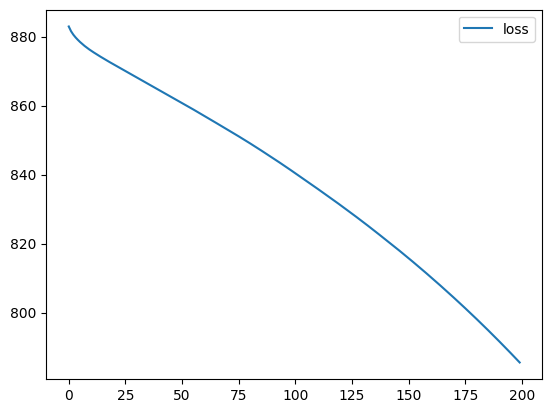

In [ ]:
loss_df.plot()

In [ ]:

ai_brain.evaluate(x_test1,y_test)

1/1 [==============================] - 0s 103ms/step - loss: 896.8718


896.8717651367188

In [ ]:
x_test1 = Scaler.transform(x_test)
x_n1 = [[30]]
x_n1_1 = Scaler.transform(x_n1)
ai_brain.predict(x_n1_1)

1/1 [==============================] - 0s 28ms/step


array([[2.7820587]], dtype=float32)